In [14]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [16]:
from sklearn.preprocessing import LabelEncoder
le_Sex=LabelEncoder()
df['Sex_n']=le_Sex.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,NaN,23.4500,0
889,1,1,male,26.0,30.0000,1


In [17]:
df.drop(['Sex'],axis='columns',inplace=True)
df

,Survived,Pclass,Age,Fare,Sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [18]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Age,177
Fare,0
Sex_n,0


In [19]:
df.Age=df.Age.fillna(df.Age.mean())
df

,Survived,Pclass,Age,Fare,Sex_n
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,0
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,0,3,35.000000,8.0500,1
...,...,...,...,...,...
886,0,2,27.000000,13.0000,1
887,1,1,19.000000,30.0000,0
888,0,3,29.699118,23.4500,0
889,1,1,26.000000,30.0000,1


In [20]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
Fare,0
Sex_n,0


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Pclass','Age','Fare','Sex_n']],df.Survived,test_size=0.3)

In [22]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [23]:
model.score(X_test,y_test)

0.7798507462686567

In [25]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [26]:
X_test[:10]

,Pclass,Age,Fare,Sex_n
836,3,21.000000,8.6625,1
463,2,48.000000,13.0000,1
413,2,29.699118,0.0000,1
564,3,29.699118,8.0500,0
505,1,18.000000,108.9000,1
886,2,27.000000,13.0000,1
406,3,51.000000,7.7500,1
865,2,42.000000,13.0000,0
112,3,22.000000,8.0500,1
874,2,28.000000,24.0000,0


In [27]:
y_predicted=model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[147,  15],
       [ 44,  62]])

Text(50.722222222222214, 0.5, 'Truth')

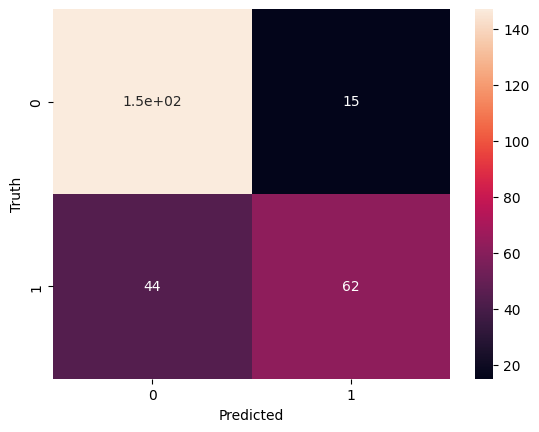

In [30]:
import seaborn as sns
sns.heatmap(cm,annot=True)
import matplotlib.pyplot as plt
plt.xlabel('Predicted')
plt.ylabel('Truth')